# 1. Introduction

The pursuit of a healthy lifestyle has become increasingly crucial in today's fast-paced and interconnected society. As individuals, we are always looking for methods to improve our wellbeing and pick daily habits that are right for us. 

This project will use <a href="https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset?select=Sleep_health_and_lifestyle_dataset.csv">Sleep Health and Lifestyle Dataset</a> to analyse health indicators related to sleep and daily habits. 

<img src="image.jpg" width=500 height=300/>

# 2. The dataset

The data contains details such as gender, age, occupation, sleep duration, quality of sleep, physical activity level, stress levels, BMI category, blood pressure, heart rate, daily steps, and the presence or absence of sleep disorders. 

Let's load the file and see what the data looks like

In [2]:
# Importing pandas library
import pandas as pd

# Read the data as the variable data frame
df = pd.read_csv("Sleep_health_and_lifestyle_dataset.csv")

# Print out the head of data frame
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [3]:
# Get the shape of our data to get a general picture
print(f"The data set has {df.shape[0]} rows and {df.shape[1]} columns")

# Get all the column names
print(f"Our data's column names {df.columns}")

The data set has 374 rows and 13 columns
Our data's column names Index(['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps',
       'Sleep Disorder'],
      dtype='object')


# 3. Data cleaning

Let's start cleaning the data. We will make the data set easier to read and check if there are any NaN values.

In [4]:
# Set the "Person ID" column as index to make us easier to keep track 
df.set_index(keys = "Person ID", inplace = True)

df.head()  # Print sample to see if the index has been changed

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
Person ID,,,,,,,,,,,,
1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [5]:
# Check if are there any NaN values
df.isna().values.any()

False

# 4. Data exploration

Our data is now clean. Let's answer our questions by exploring the data. 

According to my research, normal human heart rate is between 60 and 100 beats per minute, so we will check if are there anyone are out of this range

In [6]:
# Count the number of people out of the normal heart rate range
num_people = len(df[(df["Heart Rate"] < 60) | (df["Heart Rate"] > 100)])
print(f"The number of people have abnormal heart rate is {num_people}")

The number of people have abnormal heart rate is 0


All of people in our data set is in the normal heart rate, so we will not use this column. Let's drop it

In [7]:
df.drop(columns = "Heart Rate", inplace = True)

# Let's print the random sample of 10 rows in our data
df.sample(10)

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Daily Steps,Sleep Disorder
Person ID,,,,,,,,,,,
234,Male,44,Salesperson,6.3,6,45,7,Overweight,130/85,6000,Insomnia
349,Female,57,Nurse,8.2,9,75,3,Overweight,140/95,7000,Sleep Apnea
49,Male,31,Doctor,7.7,7,75,6,Normal,120/80,8000,None
322,Female,53,Engineer,8.4,9,30,3,Normal,125/80,5000,None
120,Female,37,Accountant,7.2,8,60,4,Normal,115/75,7000,None
265,Male,48,Doctor,7.3,7,65,5,Obese,142/92,3500,Insomnia
104,Male,36,Teacher,6.6,5,35,7,Overweight,129/84,4800,Sleep Apnea
75,Male,33,Doctor,6.0,6,30,8,Normal,125/80,5000,None
20,Male,30,Doctor,7.6,7,75,6,Normal,120/80,8000,None


In [8]:
# Replace the "Blood Pressure" column with the condition of blood pressure
df.loc[df['Blood Pressure'] <= '120/80','Blood Pressure'] ='Normal'
df.loc[df['Blood Pressure'].between('121/81','130/90'),'Blood Pressure'] ='Elevated'
df.loc[df['Blood Pressure'] > '130/91','Blood Pressure'] = 'High'

df.sample(7)

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Daily Steps,Sleep Disorder
Person ID,,,,,,,,,,,
298,Female,50,Nurse,6.1,6,90,8,Overweight,High,10000,Sleep Apnea
199,Male,43,Salesperson,6.5,6,45,7,Overweight,High,6000,Insomnia
186,Female,42,Teacher,6.8,6,45,7,Overweight,High,5000,Sleep Apnea
70,Female,33,Scientist,6.2,6,50,6,Overweight,High,5500,None
40,Male,31,Doctor,7.6,7,75,6,Normal,High,8000,None
344,Female,57,Nurse,8.1,9,75,3,Overweight,High,7000,None
48,Male,31,Doctor,7.8,7,75,6,Normal,High,8000,None


Let's calculate the average sleep duration according to type of occupation.

In [9]:
# We will group data by occupation
sleep_duration_data = df.groupby("Occupation").agg({"Sleep Duration": pd.Series.mean,
                                                   "Quality of Sleep": pd.Series.mean})

# Sort the value from the smallest to the largest
sleep_duration_data.sort_values(by = "Sleep Duration", inplace = True)

# Format the mean value by 2 decimal places
pd.options.display.float_format = "{:,.2f}".format

# Let's see how our result looks
sleep_duration_data

,Sleep Duration,Quality of Sleep
Occupation,,
Sales Representative,5.90,4.00
Scientist,6.00,5.00
Salesperson,6.40,6.00
Teacher,6.69,6.97
Software Engineer,6.75,6.50
Manager,6.90,7.00
Doctor,6.97,6.65
Nurse,7.06,7.37
Accountant,7.11,7.89


According to the result above, we see that people who work as Sales Representative have the least sleep duration (just 5.9 hours a day) and also the worst quality of sleep (4 out of 10 scale).

However, let's take a closer look.

In [10]:
# Let's see how many people work as the "Sale Representative" 
df[df["Occupation"] == "Sales Representative"]

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Daily Steps,Sleep Disorder
Person ID,,,,,,,,,,,
4,Male,28,Sales Representative,5.90,4,30,8,Obese,High,3000,Sleep Apnea
5,Male,28,Sales Representative,5.90,4,30,8,Obese,High,3000,Sleep Apnea


In [11]:
# Count how many occupation in the data set
num_of_occupation = df.Occupation.nunique()
print(f"There are {num_of_occupation} in the data set")

# Count the number of people in each kind of profession
num_of_people = df.groupby("Occupation").agg({"Occupation": pd.Series.count})
print(num_of_people)

There are 11 in the data set
                      Occupation
Occupation                      
Accountant                    37
Doctor                        71
Engineer                      63
Lawyer                        47
Manager                        1
Nurse                         73
Sales Representative           2
Salesperson                   32
Scientist                      4
Software Engineer              4
Teacher                       40


We can see that there are just only 2 Sales Representative, so we cannot conclude that sales representative are the one who have the least sleep duration. But we can see that both of them have the same sleep disorder: Sleep Apnea.

In [12]:
# Add a column to check if people have any sleep disorders using numpy library
import numpy as np
df["is_healthy?"] = np.where(df["Sleep Disorder"] == "None", "Yes", "No")

# Print random rows to check
df.sample(10)

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Daily Steps,Sleep Disorder,is_healthy?
Person ID,,,,,,,,,,,,
286,Female,50,Nurse,6.00,6,90,8,Overweight,High,10000,Sleep Apnea,No
219,Male,43,Engineer,7.80,8,90,5,Normal,High,8000,Sleep Apnea,No
321,Female,53,Engineer,8.50,9,30,3,Normal,High,5000,None,Yes
152,Male,39,Lawyer,7.20,8,60,5,Normal,High,8000,None,Yes
283,Female,50,Nurse,6.00,6,90,8,Overweight,High,10000,Sleep Apnea,No
309,Female,52,Accountant,6.60,7,45,7,Overweight,High,6000,Insomnia,No
347,Female,57,Nurse,8.20,9,75,3,Overweight,High,7000,Sleep Apnea,No
238,Female,44,Teacher,6.50,7,45,4,Overweight,High,6000,Insomnia,No
301,Female,51,Engineer,8.50,9,30,3,Normal,High,5000,None,Yes


In [13]:
# Calculate the percentage people in our data have sleep disorder
pct_sleep_disorder = len(df[df["is_healthy?"] == "No"]) / df.shape[0] * 100
print(f"It is estimated that around {pct_sleep_disorder:.2f}% of people in our data have sleep disorder")

It is estimated that around 41.44% of people in our data have sleep disorder


# 5. Data visualisation

We will use some libraries to visualise the relationship between sleep duration and other factors.

In [14]:
# Import libraries
import seaborn as sns
import matplotlib.pyplot as plt

[Text(0.5, 1.0, 'Relationship between Physical Activity Level and Sleep Quality')]

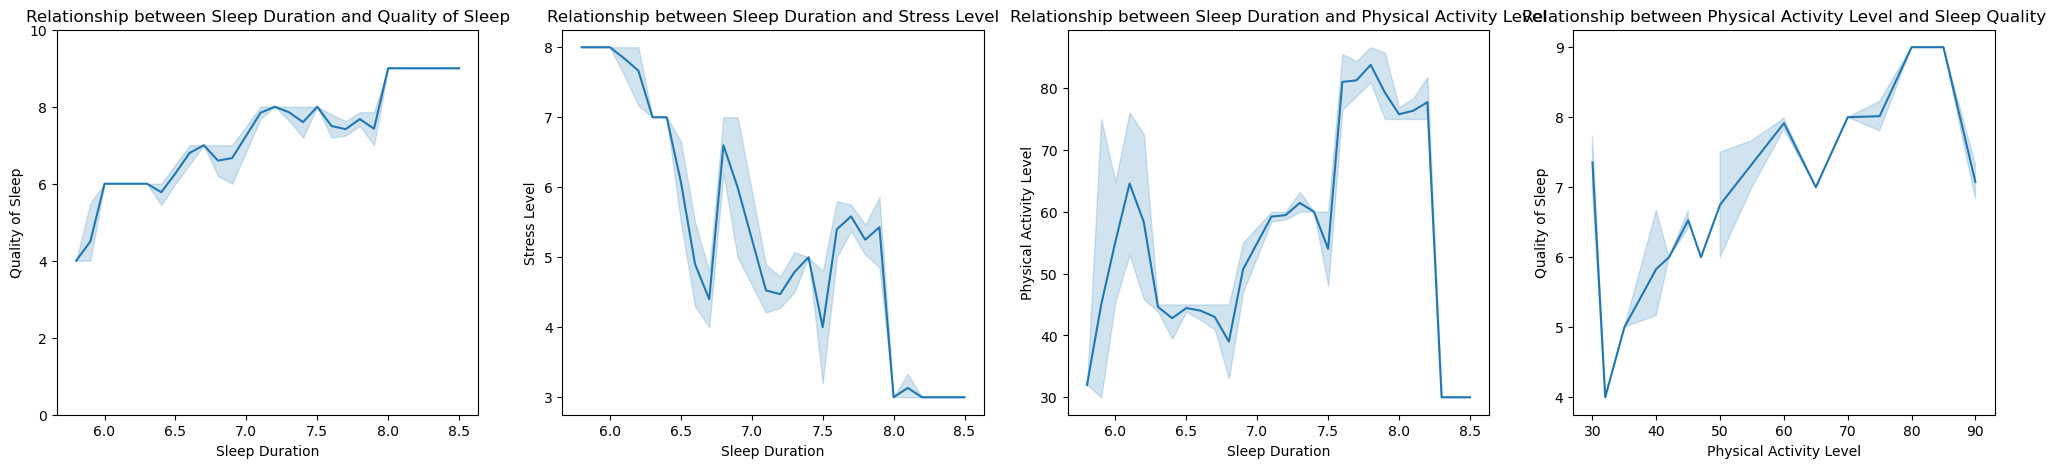

In [24]:
figures, axes = plt.subplots(nrows=1, ncols=4, figsize=(25, 5))

fig1 = sns.lineplot(ax=axes[0], data=df, x="Sleep Duration", y="Quality of Sleep")
fig1.set(ylim=(0, 10), title="Relationship between Sleep Duration and Quality of Sleep")

fig2 = sns.lineplot(ax=axes[1], data=df, x="Sleep Duration", y="Stress Level")
fig2.set(title="Relationship between Sleep Duration and Stress Level")

fig3 = sns.lineplot(ax=axes[2], data=df, x="Sleep Duration", y="Physical Activity Level")
fig3.set(title="Relationship between Sleep Duration and Physical Activity Level")

fig4 = sns.lineplot(ax=axes[3], data=df, x="Physical Activity Level", y="Quality of Sleep")
fig4.set(title="Relationship between Physical Activity Level and Sleep Quality")

Now, we will demonstrate the correlation between Occupation and Sleep Duration according to the data we get above.

[Text(0.5, 1.0, 'Sleep duration according to occupations')]

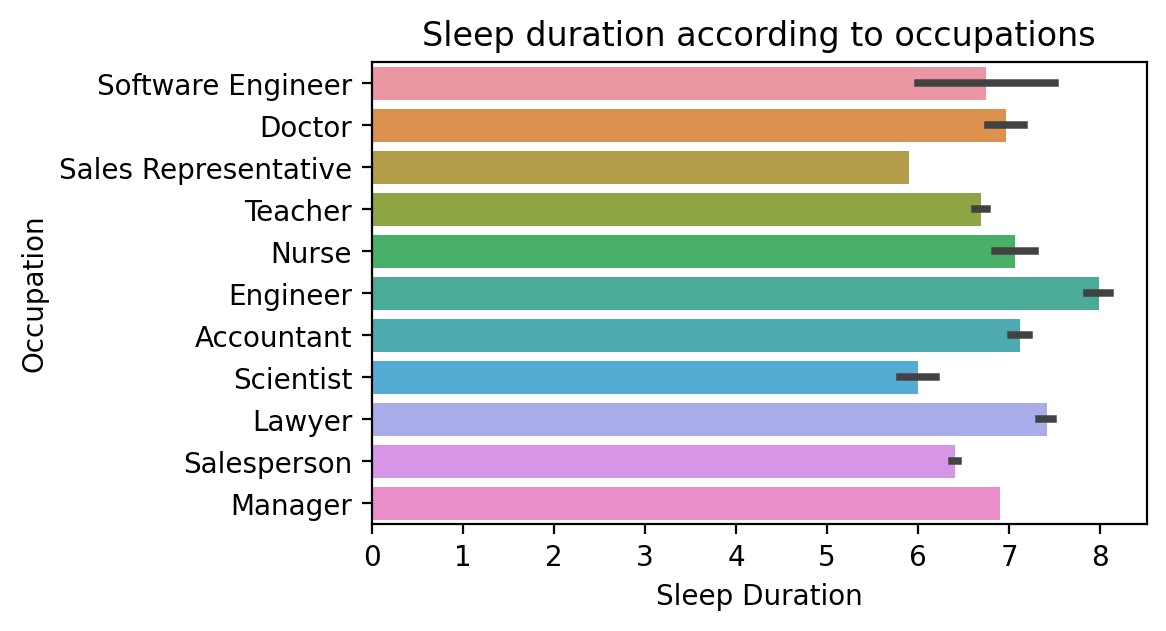

In [16]:
plt.figure(figsize=(5, 3), dpi=200)
bar_chart = sns.barplot(data=df, 
                        x="Sleep Duration", 
                        y="Occupation",
                        orient="h")
bar_chart.set(title="Sleep duration according to occupations")

# 6. Analysis by genders

We will analyse the differences in sleep quality between men and women and their ages.

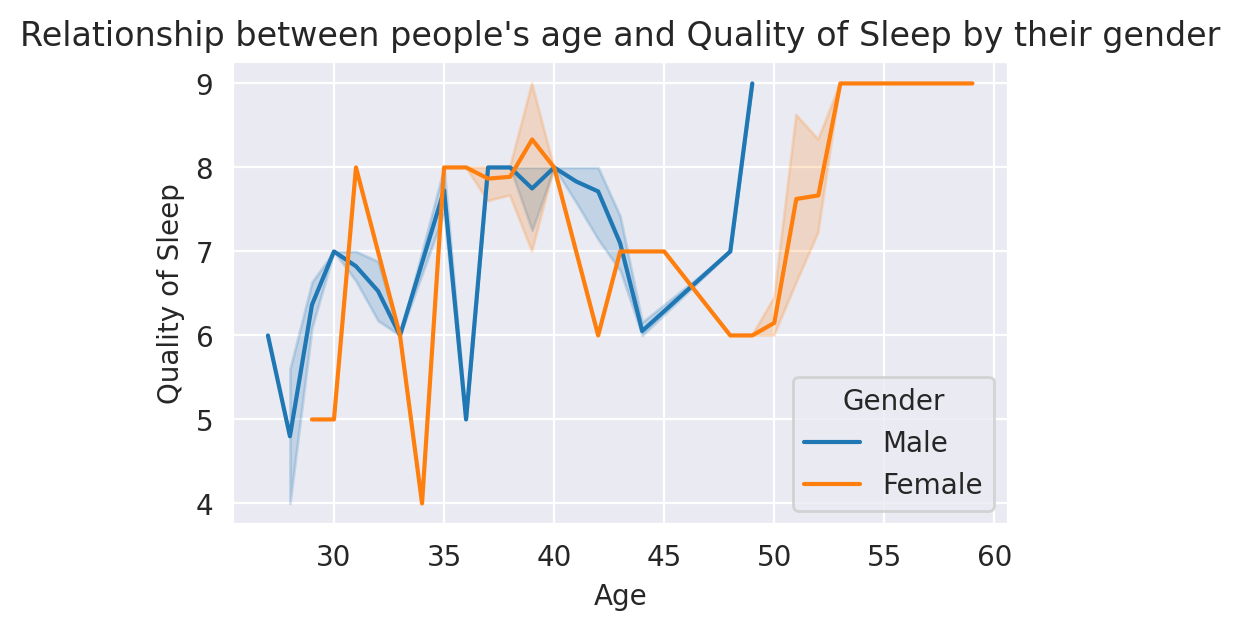

In [17]:
plt.figure(figsize=(5, 3), dpi=200)

with sns.axes_style('darkgrid'):
    fig = sns.lineplot(data=df, x="Age", y="Quality of Sleep", hue="Gender")
    fig.set(title="Relationship between people's age and Quality of Sleep by their gender")

Relationship between quality of sleep and sleep duration by genders.

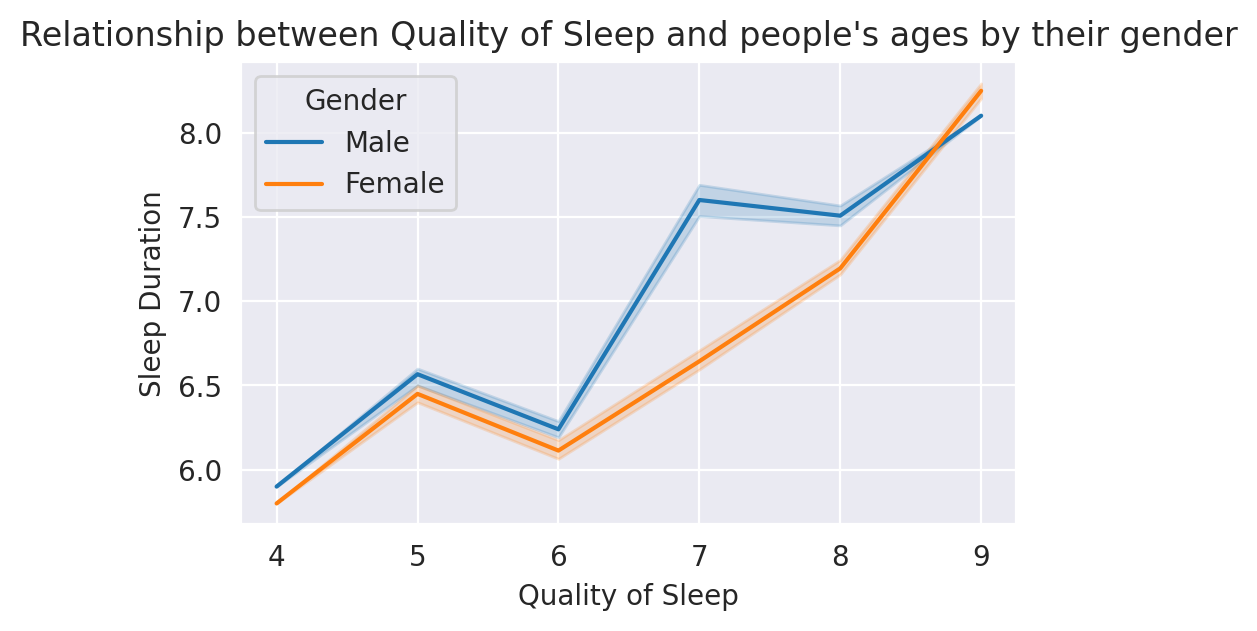

In [18]:
plt.figure(figsize=(5, 3), dpi=200)

with sns.axes_style('darkgrid'):
    fig = sns.lineplot(data=df, x="Quality of Sleep", y="Sleep Duration", hue="Gender")
    fig.set(title="Relationship between Quality of Sleep and people's ages by their gender")

# 7. Linear Regression

Now, we will use scikit-learn to run our regression.

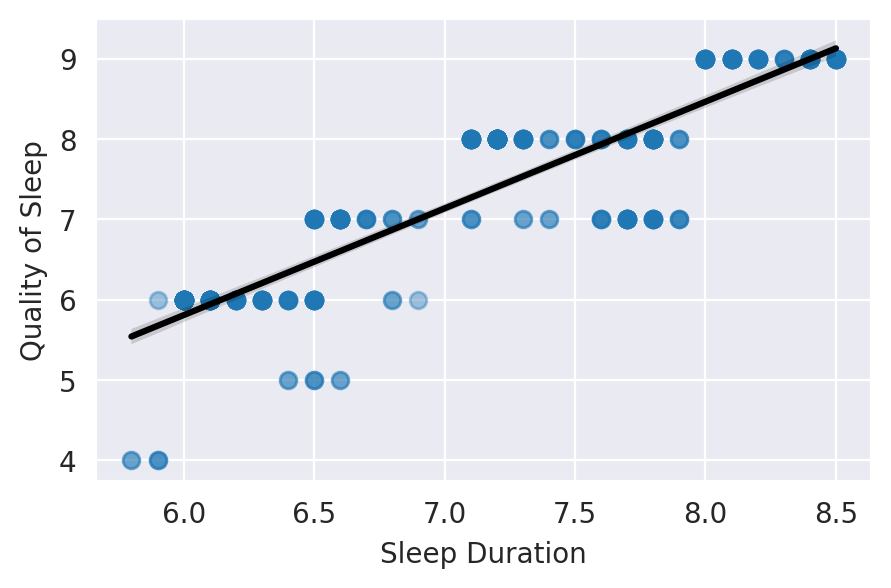

In [19]:
# Plot the graph and predict the quality of sleep based on sleep duration
plt.figure(figsize=(5, 3), dpi=200)

with sns.axes_style('darkgrid'):
    fig = sns.regplot(data=df, x="Sleep Duration", y="Quality of Sleep", scatter_kws={"alpha": 0.4}, line_kws={"color": "black"})

In [20]:
# Import statement
from sklearn.linear_model import LinearRegression

# Create a LinearRegression object
regression = LinearRegression()

In [21]:
# Explanatory Variable or Feature
X = pd.DataFrame(df, columns=["Sleep Duration"])

# Response Variable or Target
y = pd.DataFrame(df, columns=["Quality of Sleep"])

# Find the best-fit line
regression.fit(X, y)

print(f"The slope coefficient is: {regression.coef_[0]}")
print(f"The intercept is: {regression.intercept_[0]}")
print(f"The r-squared is: {regression.score(X, y)}")

The slope coefficient is: [1.32867226]
The intercept is: -2.1633700385259598
The r-squared is: 0.7800652040943268


Our r-squared comes in at around 0.78. This means that our model explains about 78% of the variance in quality of sleep. 

Now we can use our Linear Regression model to estimate for people with sleep duration of 7 hours a day.

In [22]:
duration = 7
sleep_quality_predict = regression.intercept_[0] + regression.coef_[0, 0] * duration
print(f"The estimated sleep quality for a person sleeps average of 7 hours per day is {sleep_quality_predict}")

The estimated sleep quality for a person sleeps average of 7 hours per day is 7.137335802690567


# 8. Summary

<ul>
<li>There is a positive relationship between sleep duration and quality of sleep. However, the opposite result can be found between sleep duration and stress level. That means the longer people sleep, the higher their sleep quality. Also, sleep duration can be affected by stress levels. People should maintain their sleep level as low as possible to have a higher sleep duration.</li>

<li>Overall, men have higher quality of sleep than women with the same level of sleep duration. This can be explained by various factors, including their physiological factors or their lifestyle. Men can exercise and do more activities in their daily life than women.</li>

<li>The findings can partly be explained by the models. The r-square in our linear regression is at around 0.78. This suggests that our models can able to accurately predict sleep quality based on the data provided.</li>
</ol>

# 9. Conclusion

In [23]:
# should people increase their sleep duration to improve their health?
more_sleep_duration = True